In [1]:
!pip install arviz==0.11.0
!pip install pymc3==3.10

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import arviz as az
import pymc3 as pm
import warnings

[]

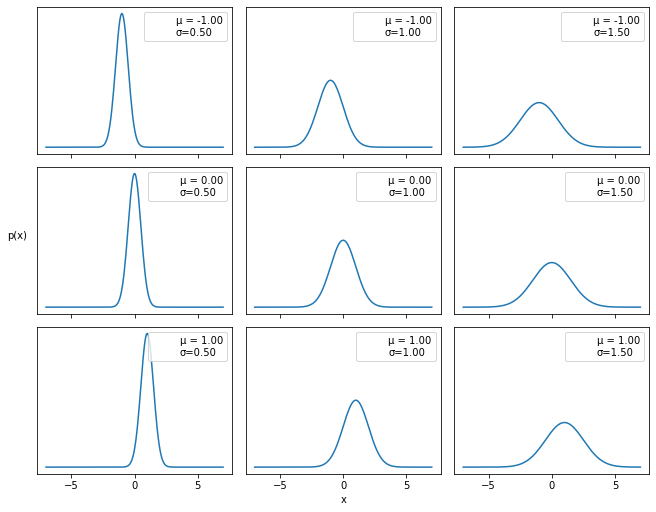

In [3]:
# plotting normal curves with different values of mean and std deviation
mu_params = [-1,0,1]
sd_params = [0.5,1,1.5]
x = np.linspace(-7,7,200)

fig, ax = plt.subplots(len(mu_params), len(sd_params), sharex = True,
                      sharey = True, figsize = (9,7), constrained_layout = True)
for i in range(3):
    for j in range(3):
        mu  = mu_params[i]
        sd = sd_params[j]
        y = sp.stats.norm(mu,sd).pdf(x)
        ax[i,j].plot(x,y)
        ax[i,j].plot(0,0,label= "μ = {:3.2f}\nσ={:3.2f}".format(mu,sd), alpha = 0)
        ax[i,j].legend(loc = 1)
ax[2,1].set_xlabel('x')
ax[1,0].set_ylabel('p(x)', rotation = 0, labelpad = 20)
ax[1,0].set_yticks([])

Text(-0.03, 0.5, 'p(θ)')

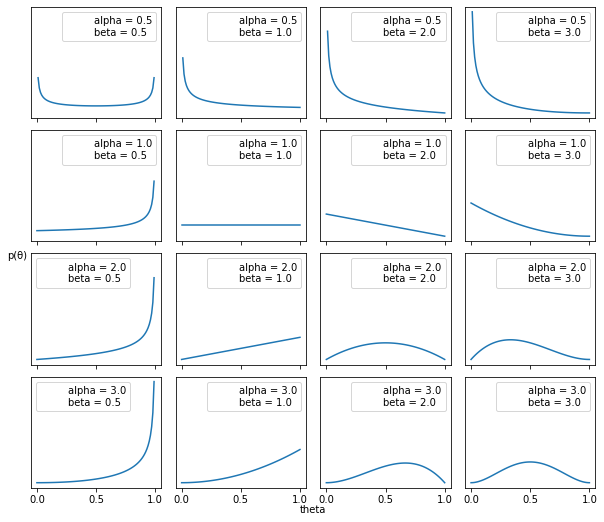

In [21]:
# ploting beta distribution for different values of alpha and beta
params = [0.5, 1, 2, 3]
x = np.linspace(0,1,100)
fig, ax = plt.subplots(len(params), len(params), figsize = (8,7),
                      sharex = True, sharey = True, constrained_layout = True)

for i in range(4):
    for j in range(4):
        a = params[i]
        b = params[j]
        y = sp.stats.beta(a,b).pdf(x)
        
        ax[i,j].plot(x,y)
        ax[i,j].plot(0,0,label="alpha = {:2.1f}\nbeta = {:2.1f}".format(a,b),alpha = 0)
        ax[i,j].legend()
ax[1,0].set_yticks([])
ax[1,0].set_xticks([0,0.5,1])
fig.text(0.5, -0.01, "theta", ha = "center")
fig.text(-0.03, 0.5, 'p(θ)', va='center', rotation=0)

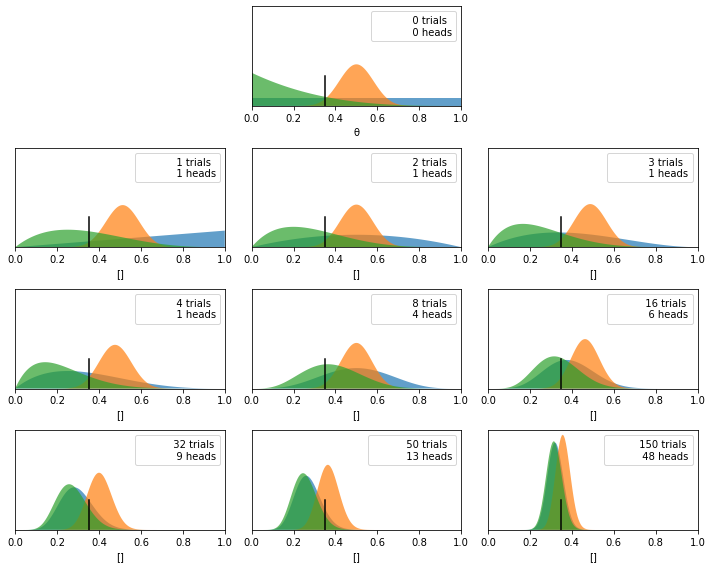

In [8]:
n_trials = [0,1,2,3,4,8,16,32,50,150]
data = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48]
theta_real = 0.35
beta_params = [(1,1), (20,20), (1,4)]

dist = sp.stats.beta
x = np.linspace(0,1,200)
plt.figure(figsize = (10,8))
for idx, N in enumerate(n_trials):
    if idx == 0:
        plt.subplot(4,3,2)
        plt.xlabel('θ')
    else:
        plt.subplot(4,3,idx+3)
        plt.xlabel([])
    z = data[idx]
    for(a_prior, b_prior) in beta_params:
        # posterior
        p_theta_given_y = dist.pdf(x,a_prior+z, N-z+b_prior)
        plt.fill_between(x,0, p_theta_given_y, alpha = 0.7)
    plt.axvline(x = theta_real, ymax = 0.3, color = 'k')
    plt.plot(0,0,label = f'{N:4d} trials\n{z:4d} heads', alpha = 0)
    plt.xlim(0,1)
    plt.ylim(0,12)
    plt.legend()
    plt.yticks([])
plt.tight_layout()

<AxesSubplot:title={'center':'θ'}>

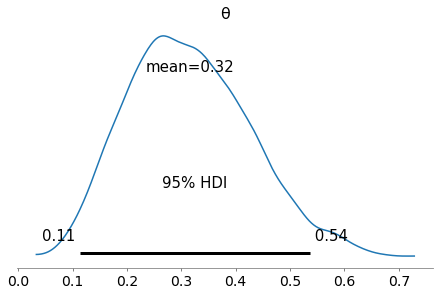

In [10]:
# plotting posterior 
np.random.seed(1)
az.plot_posterior({'θ':sp.stats.beta.rvs(5,11,size = 5000)},hdi_prob = 0.95)

F:\Lockdown\New\lib\site-packages\pymc3\sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 50 seconds.
F:\Lockdown\New\lib\site-packages\arviz\data\io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<AxesSubplot:title={'center':'theta'}>,
        <AxesSubplot:title={'center':'theta'}>]], dtype=object)

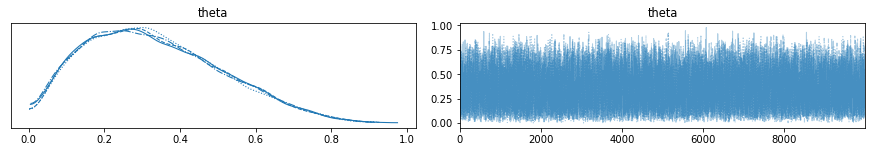

In [18]:
np.random.seed(123)
trials = 4
theta_real = 0.35
data = sp.stats.bernoulli.rvs(p = theta_real, size = trials)


with pm.Model() as firstModel:
    theta = pm.Beta('theta', alpha = 1, beta = 1)
    y = pm.Bernoulli('y', p = theta, observed = data)
    trace = pm.sample(10000, random_seed = 123)
az.plot_trace(trace)

F:\Lockdown\New\lib\site-packages\arviz\data\io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


<AxesSubplot:title={'center':'theta'}>

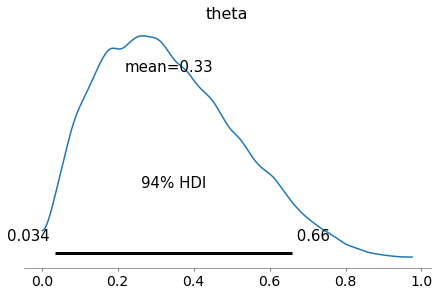

In [19]:
az.plot_posterior(trace)

In [20]:
az.summary(trace)

F:\Lockdown\New\lib\site-packages\arviz\data\io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
theta,0.334,0.178,0.034,0.658,0.001,0.001,17126.0,17126.0,16481.0,20695.0,1.0


F:\Lockdown\New\lib\site-packages\arviz\data\io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


<AxesSubplot:title={'center':'theta'}>

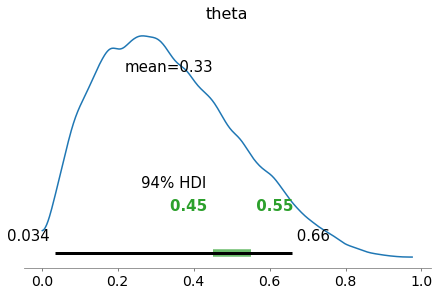

In [21]:
az.plot_posterior(trace, rope = (0.45, 0.55))